In [1]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv


import numpy as np


In [2]:
office = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/office.csv")
print(office.shape)
office.head()
#the code to scrape this data was written by the wonderful Julia Silge, here: https://juliasilge.com/blog/lasso-the-office/

(136, 32)


,season,episode,episode_name,andy,angela,darryl,dwight,jim,kelly,kevin,...,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer,imdb_rating
0,1,1,pilot,0,1,0,29,36,0,1,...,0,0,0,0,0,0,0,0,0,7.6
1,1,2,diversity day,0,4,0,17,25,2,8,...,0,0,0,0,0,0,0,0,0,8.3
2,1,3,health care,0,5,0,62,42,0,6,...,0,0,0,0,0,0,0,0,0,7.9
3,1,5,basketball,0,3,15,25,21,0,1,...,0,0,0,0,0,0,0,0,0,8.4
4,1,6,hot girl,0,3,0,28,55,0,5,...,1,0,0,0,0,0,0,0,0,7.8


In [3]:
# Just for visualization
office_long = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/office_long.csv")
office_long.head()

,season,episode,episode_name,ken_kwapis,greg_daniels,b_j_novak,paul_lieberstein,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer,imdb_rating,name,value
0,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,andy,0
1,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,angela,1
2,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,darryl,0
3,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,dwight,29
4,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,jim,36


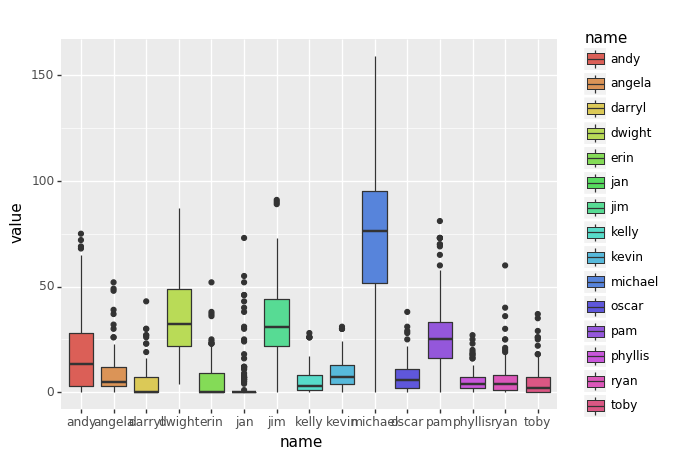

<ggplot: (306138134)>

In [4]:
(ggplot(office_long, aes(x = "name", y = "value", fill = "name"))+ geom_boxplot())

In [5]:
feat = office.columns[3:31]
X = office[feat]
y = office["imdb_rating"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[feat] = z.fit_transform(X_train[feat])
X_test[feat] = z.transform(X_test[feat])

X_train.head()

,andy,angela,darryl,dwight,jim,kelly,kevin,michael,oscar,pam,...,paul_lieberstein,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer
0,-0.994093,-0.809514,-0.599878,-0.376779,0.043101,-0.878471,-1.185955,0.270490,-0.638783,0.756677,...,-0.417029,-0.462042,-0.353553,-0.319438,-0.319438,-0.301511,-0.319438,-0.282843,-0.319438,-0.242536
103,-0.058476,-0.595755,0.042848,-0.807953,-0.742058,-0.040354,-0.592291,-0.343675,0.041578,-0.169998,...,-0.417029,-0.462042,-0.353553,-0.319438,-0.319438,-0.301511,-0.319438,-0.282843,3.130495,-0.242536
54,-0.760189,-0.488875,-0.599878,0.323880,0.099183,-0.375601,-0.889123,0.430706,-0.094494,-0.865003,...,-0.417029,2.164304,-0.353553,-0.319438,-0.319438,-0.301511,-0.319438,-0.282843,-0.319438,-0.242536
102,0.000000,-0.488875,0.171394,-0.915747,-1.246803,-0.040354,-0.295458,-0.103350,-0.774855,-0.633335,...,2.397916,-0.462042,-0.353553,-0.319438,-0.319438,-0.301511,-0.319438,-0.282843,-0.319438,-0.242536
31,1.403426,-0.488875,-0.599878,1.994681,1.725583,0.127270,-0.295458,1.445413,-1.046999,0.467091,...,-0.417029,-0.462042,-0.353553,-0.319438,-0.319438,-0.301511,-0.319438,3.535534,-0.319438,-0.242536


# Regular

In [6]:
lr = LinearRegression()

lr.fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lr.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lr.predict(X_test)))

TRAIN:  0.2742622742054735
TEST :  0.4035173386169154


# Ridge

In [7]:
rr = Ridge()

rr.fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, rr.predict(X_test)))

TRAIN:  0.27428765390554377
TEST :  0.40332676154428265


# LASSO

In [8]:
lsr = Lasso()

lsr.fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lsr.predict(X_test)))

TRAIN:  0.39783950617283953
TEST :  0.36726190476190473


# In Class

In [9]:
from sklearn.linear_model import RidgeCV, LassoCV

In [17]:
# LASSO
feat = office.columns[3:31]
X = office[feat]
y = office["imdb_rating"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[feat] = z.fit_transform(X_train[feat])
X_test[feat] = z.transform(X_test[feat])

X_train.head()

lsr_tune = LassoCV(cv = 5).fit(X_train,y_train)
# lsr_tune = LassoCV(cv = 5, alphas = [0.001,0.01,0.05,1]).fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr_tune.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lsr_tune.predict(X_test)))

print("\nwe chose " + str(lsr_tune.alpha_) + " as our alpha.")

TRAIN:  0.3197275565835297
TEST :  0.33527022797520606

we chose 0.05 as our alpha.


In [13]:
# Ridge
feat = office.columns[3:31]
X = office[feat]
y = office["imdb_rating"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[feat] = z.fit_transform(X_train[feat])
X_test[feat] = z.transform(X_test[feat])

X_train.head()

rr_tune = RidgeCV(cv = 5).fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr_tune.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, rr_tune.predict(X_test)))

print("\nwe chose " + str(rr_tune.alpha_) + " as our alpha.")

TRAIN:  0.2915554060481597
TEST :  0.3585552763415817

we chose 10.0 as our alpha.
